<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/main/notebooks/douglas_tsa_cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Major_indices.csv')
df.head()

,Date,Price,Index
0,30/01/2012,"20,731.72",NGX ASI
1,31/01/2012,"20,875.83",NGX ASI
2,01/02/2012,"20,790.88",NGX ASI
3,02/02/2012,"20,822.00",NGX ASI
4,03/02/2012,"20,877.64",NGX ASI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8097 entries, 0 to 8096
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    8094 non-null   object
 1   Price   8094 non-null   object
 2   Index   8094 non-null   object
dtypes: object(3)
memory usage: 189.9+ KB


In [7]:
df.Date = pd.to_datetime(df.Date, format='mixed')
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Price,Index
Date,,
2012-01-30,"20,731.72",NGX ASI
2012-01-31,"20,875.83",NGX ASI
2012-01-02,"20,790.88",NGX ASI
2012-02-02,"20,822.00",NGX ASI
2012-03-02,"20,877.64",NGX ASI


In [9]:
df['Index'].value_counts()

,count
Index,
NGX ASI,2794
S&P/FMDQ SBI,2602
AFEX ACI,1562
USD/NGN,1136


In [13]:
df_ngx = df[df['Index'] == 'NGX ASI'].copy()
df_ngx.head()

,Price,Index
Date,,
2012-01-30,"20,731.72",NGX ASI
2012-01-31,"20,875.83",NGX ASI
2012-01-02,"20,790.88",NGX ASI
2012-02-02,"20,822.00",NGX ASI
2012-03-02,"20,877.64",NGX ASI


In [14]:
df_ngx['Index'].value_counts()

,count
Index,
NGX ASI,2794


In [15]:
df_ngx.drop(columns=['Index'], inplace=True)
df_ngx.head()

,Price
Date,
2012-01-30,"20,731.72"
2012-01-31,"20,875.83"
2012-01-02,"20,790.88"
2012-02-02,"20,822.00"
2012-03-02,"20,877.64"


In [16]:
df_ngx['Price'] = df_ngx['Price'].str.replace(',', '').astype(float)
df_ngx['YearMonth'] = df_ngx.index.to_period('M')
df_monthly_avg = df_ngx.groupby('YearMonth')['Price'].mean().to_frame()
df_monthly_avg.head()

,Price
YearMonth,
2012-01,22069.654286
2012-02,21293.190476
2012-03,21807.626364
2012-04,22238.324211
2012-05,22824.409524


In [17]:
df_monthly_avg.describe()

,Price
count,144.000000
mean,35239.746003
std,8912.656224
min,21293.190476
25%,27719.818842
50%,34161.535455
75%,39917.228967
max,54951.850000


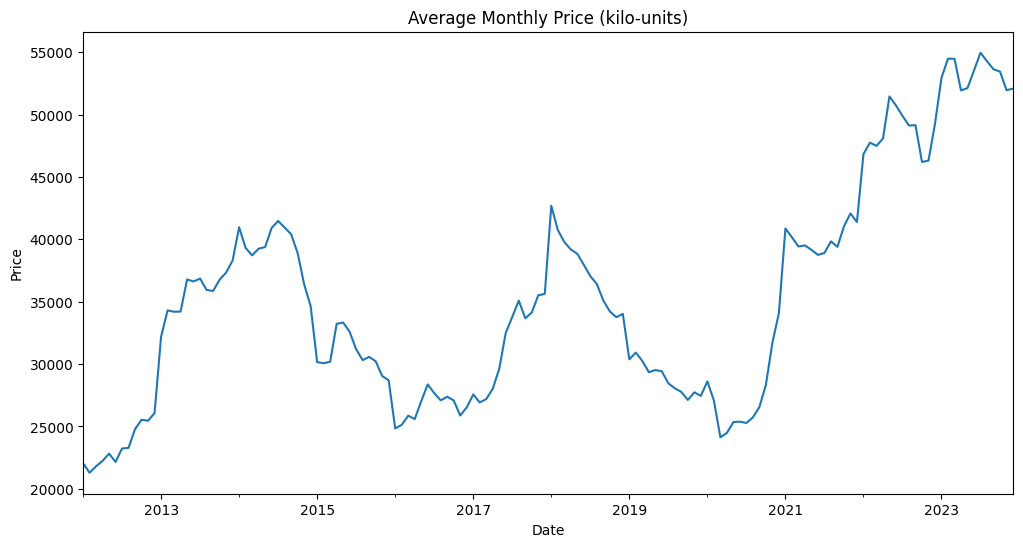

In [18]:
df_monthly_avg['Price'].plot(title='Average Monthly Price (kilo-units)',
                             figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

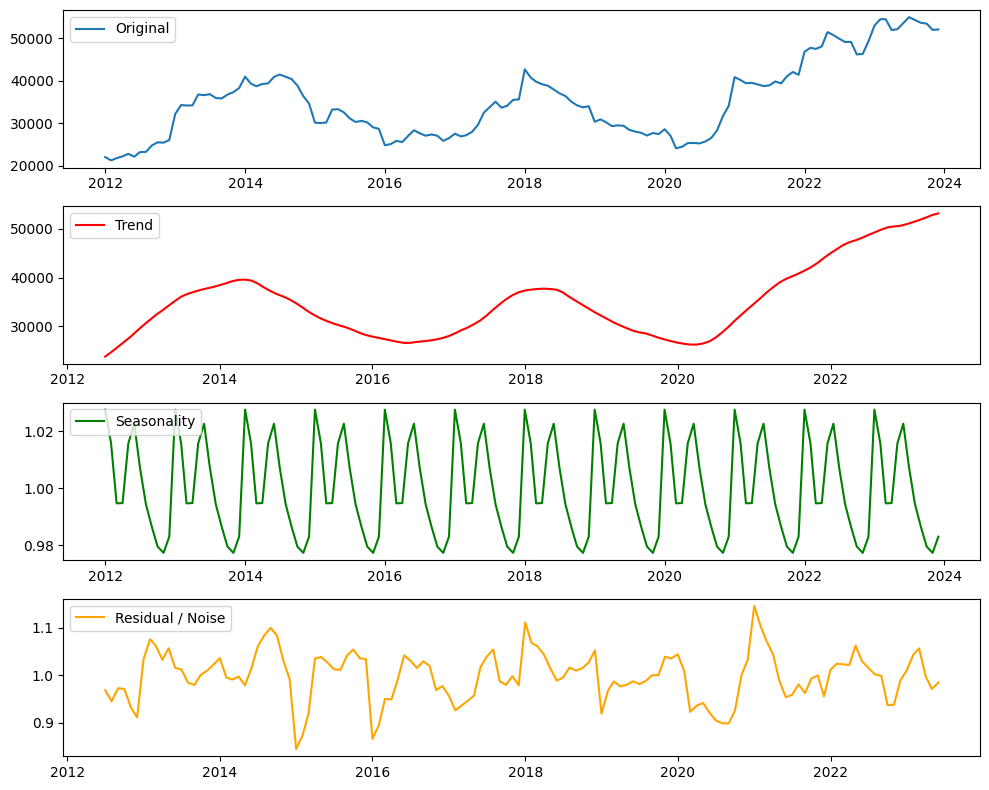

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_monthly_avg.index = df_monthly_avg.index.to_timestamp()
decomposition = seasonal_decompose(df_monthly_avg['Price'], model='multiplicative', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(df_monthly_avg['Price'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual / Noise', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_monthly_avg['Price'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")

ADF Statistic: -1.2368324712671481
p-value: 0.6575541025585911
The series is likely non-stationary
